In [1]:
from sklearn import datasets

bc = datasets.load_breast_cancer(as_frame=True)
bc.data


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
bc.target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.25, random_state=1234)
print(X_train.shape, y_train.shape)

(426, 30) (426,)


531    1
166    1
485    1
66     1
220    1
      ..
104    1
229    0
192    1
202    0
435    0
Name: target, Length: 143, dtype: int64

In [8]:
from sklearn.svm import SVC
svm_clf = SVC()

In [9]:
svm_clf.fit(X_train, y_train)

SVC()

In [10]:
predicted = svm_clf.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        55
           1       0.88      1.00      0.94        88

    accuracy                           0.92       143
   macro avg       0.94      0.89      0.91       143
weighted avg       0.93      0.92      0.91       143



In [13]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
predicted = svm_clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        55
           1       0.93      0.98      0.96        88

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=1234)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=1234)

In [15]:
predicted = sgd_clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        55
           1       0.88      0.98      0.92        88

    accuracy                           0.90       143
   macro avg       0.92      0.88      0.89       143
weighted avg       0.91      0.90      0.90       143



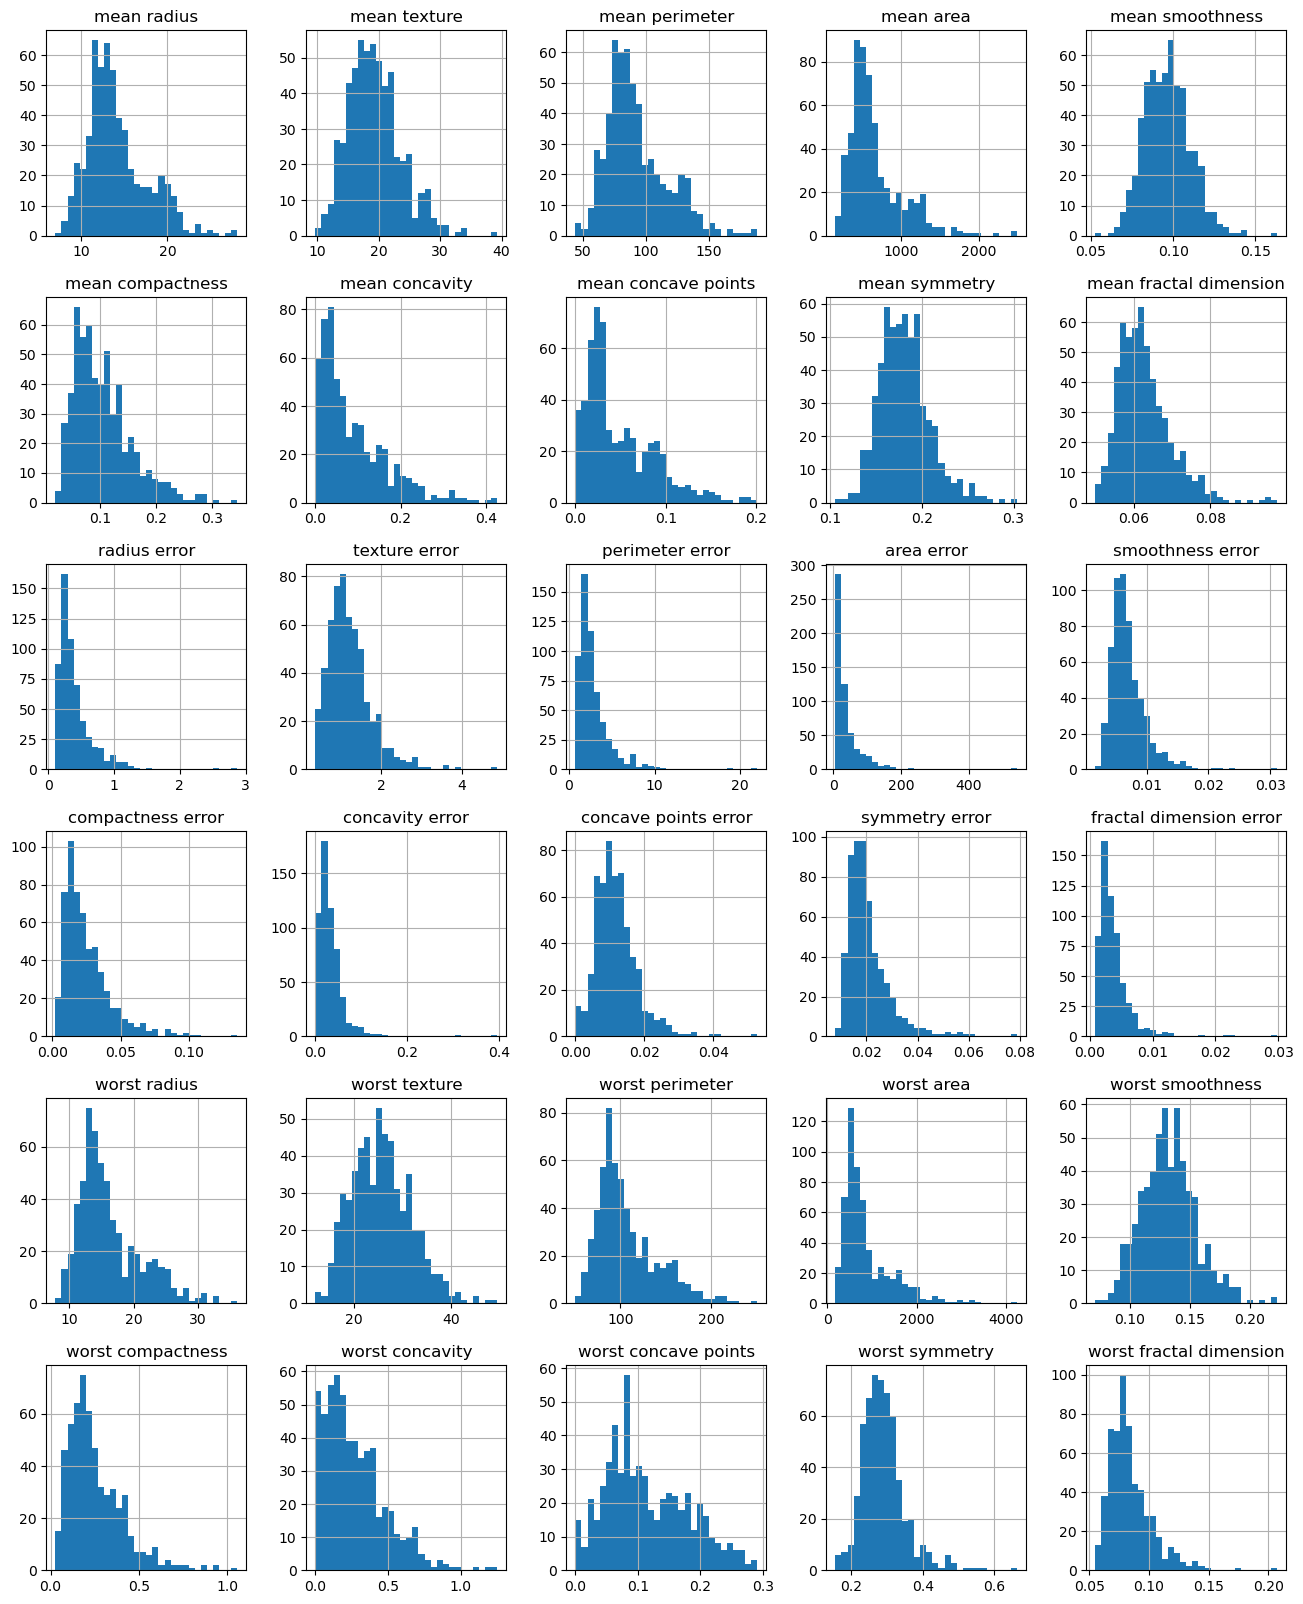

In [18]:
_ = bc.data.hist(figsize=(16,20), bins=30)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [21]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
sgd_clf = SGDClassifier(random_state=1234)
sgd_clf.fit(X_train_scaled, y_train)
predicted = sgd_clf.predict(X_test_scaled)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        55
           1       0.96      0.99      0.97        88

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [25]:
from sklearn.model_selection import cross_val_score
sgd_clf = SGDClassifier(random_state=1234)
scores = cross_val_score(sgd_clf, bc.data, bc.target, cv=5)
scores

array([0.87719298, 0.92982456, 0.90350877, 0.95614035, 0.91150442])

In [26]:
print(scores.mean(), scores.std())

0.9156342182890855 0.02639667733319382


In [27]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SGDClassifier(random_state=1234))
scores = cross_val_score(clf, bc.data, bc.target, cv=5)
scores

array([0.96491228, 0.98245614, 0.94736842, 0.96491228, 0.99115044])

In [28]:
print(scores.mean(), scores.std())

0.9701599130569786 0.01527302805266976
